# 3.1 Perceptron Algorithm: nepochs=25,learning rate = 0.001

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(666)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_boundary(clf, X_train, Y_train, xx, yy):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train,
                cmap=plt.cm.coolwarm,
                edgecolors='k')
    plt.show()


class Perceptron():

    def __init__(self, learning_rate=0.01):
        self.lr = learning_rate
        self.weights = np.array([[5., 0., 5.]])

    def fit_epoch(self, X, Y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        shuff = np.random.permutation(len(Y))
        X, Y = X[shuff], Y[shuff]
        for Xi, Yi in zip(X,Y):
            Yi_Pred = np.sign(np.dot(Xi, self.weights.T))
            Error = Yi_Pred - Yi
            delta_Weights = self.lr*Error*Xi
            self.weights = self.weights - delta_Weights    
            
         
    def predict(self, X):
        asd = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.sign(np.dot(asd, self.weights.T))



Iteration  0


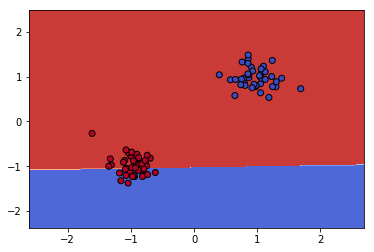

Iteration  1


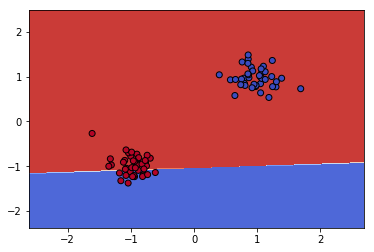

Iteration  2


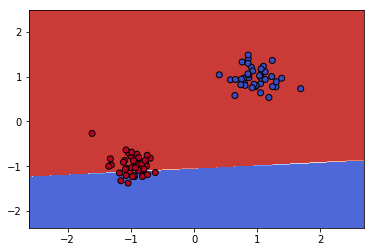

Iteration  3


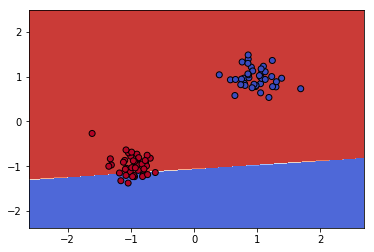

Iteration  4


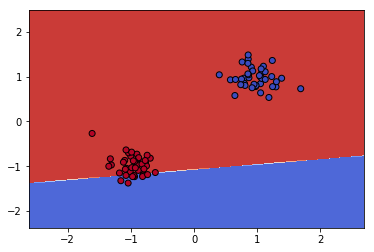

Last decision boundary after 25 iteration


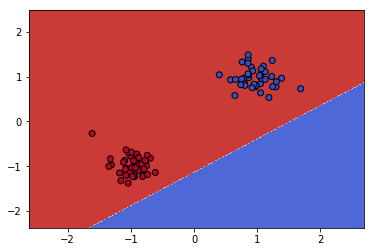

In [2]:

if __name__ == '__main__':
    N, M = 40, 2
    X_train = np.r_[np.random.randn(N, M) + [1, 1], np.random.randn(N, M) + [10, 10]]
    X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    Y_train = np.array([1]*N + [-1]*N)

    xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])

    n_epochs = 25
    clf = Perceptron(learning_rate=0.001)
        
    for i in range(n_epochs):
        clf.fit_epoch(X_train,Y_train)
        if(i<5):
            print("Iteration ",i)
            plot_boundary(clf,X_train,Y_train,xx,yy)
    print("Last decision boundary after 25 iteration")
    plot_boundary(clf,X_train,Y_train,xx,yy)

We have implemented the perceptron algorithm on two dimentional data. For each training data sample, we are calculating the error then we are calculating the delta weights(changes in weights) and adjusting the weights. Here we are trying to minimize the error and ideally we will get the correct decision boundry when error is zero or there is no change in weights. In above code , we iterating over epoch for 25 times. Since the learning rate is low(0.001), it will take more iterations than 25 to get the more accurate decision boundry.

# 3.2  nepochs=25, learning rate = 0.1


Iteration  0


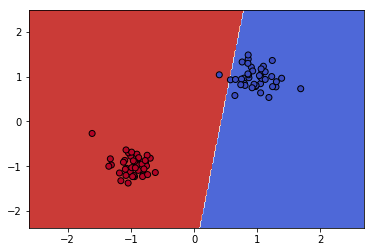

Iteration  1


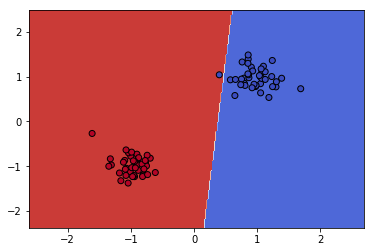

Iteration  2


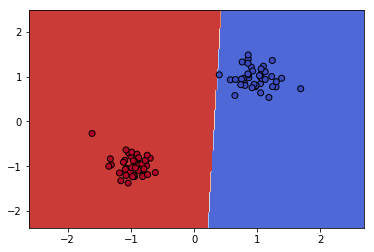

Iteration  3


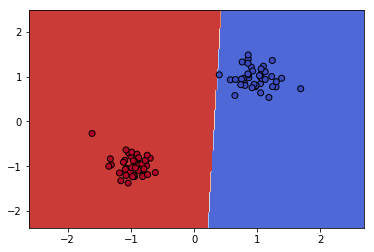

Iteration  4


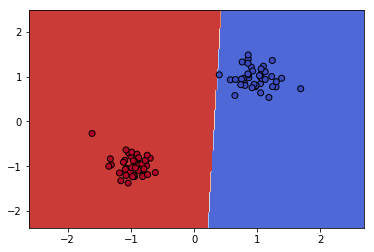

Last decision boundary after 25 iteration


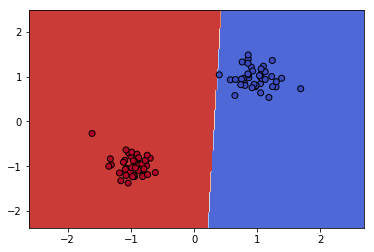

In [3]:
    n_epochs = 25
    clf = Perceptron(learning_rate=0.1)
        
    for i in range(n_epochs):
        clf.fit_epoch(X_train,Y_train)
        
        if(i<5):
            print("Iteration ",i)
            plot_boundary(clf,X_train,Y_train,xx,yy)
    print("Last decision boundary after 25 iteration")
    plot_boundary(clf,X_train,Y_train,xx,yy)

# nepochs=25,learning rate = 0.01


Iteration  0


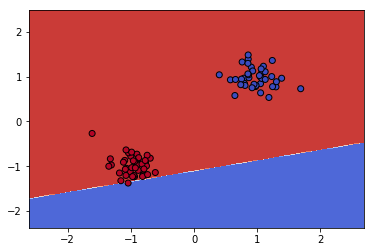

Iteration  1


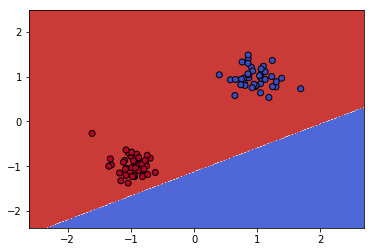

Iteration  2


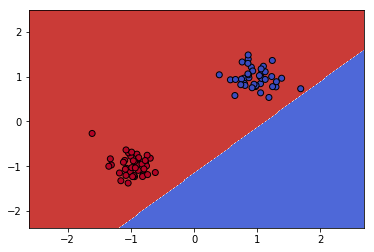

Iteration  3


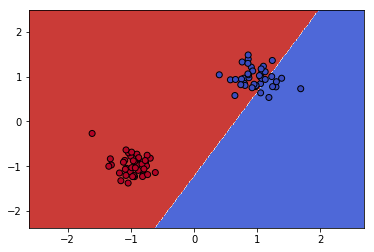

Iteration  4


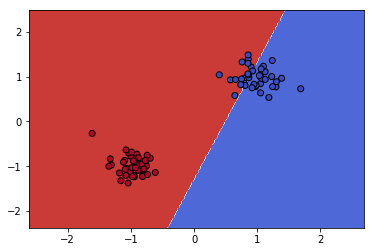

Last decision boundary after 25 iteration


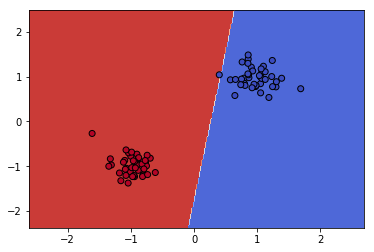

In [4]:

n_epochs = 25
clf = Perceptron(learning_rate=0.01)

for i in range(n_epochs):
    clf.fit_epoch(X_train,Y_train)
    if(i<5):
        print("Iteration ",i)
        plot_boundary(clf,X_train,Y_train,xx,yy)
print("Last decision boundary after 25 iteration")
plot_boundary(clf,X_train,Y_train,xx,yy)

# nepochs=25,learning rate = 0.0001


Iteration  0


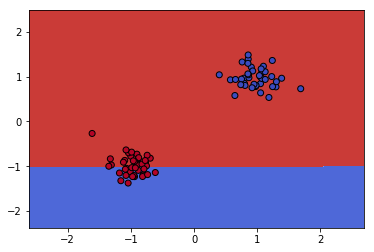

Iteration  1


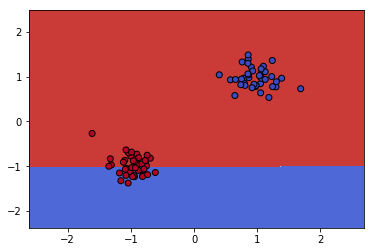

Iteration  2


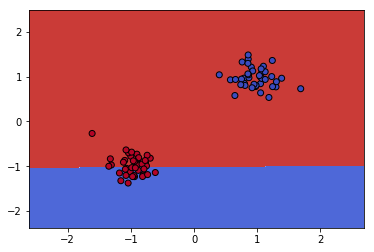

Iteration  3


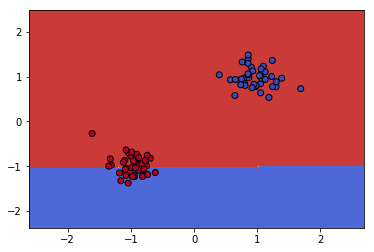

Iteration  4


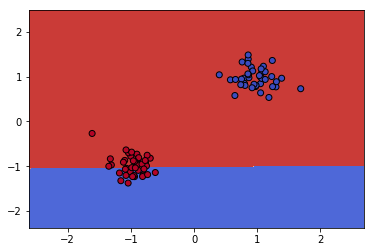

Last decision boundary after 25 iteration


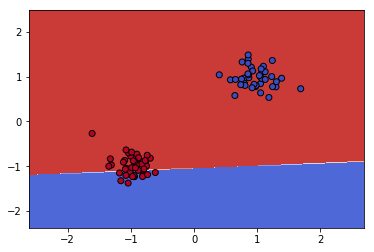

In [5]:
n_epochs = 25
clf = Perceptron(learning_rate=0.0001)

for i in range(n_epochs):
    clf.fit_epoch(X_train,Y_train)
    if(i<5):
        print("Iteration ",i)
        plot_boundary(clf,X_train,Y_train,xx,yy)
print("Last decision boundary after 25 iteration")
plot_boundary(clf,X_train,Y_train,xx,yy)

# Explaination :
 With the above plots with diffent learning rates, What I understood is , when learning rate is high graph converges more faster as compared to low learning rate where graph converges very slowly. So with low learning rate I need more number of interations over dataset to train, however with high learning rate we need less number of iterations to train. What I am observing here that learning rate actualy scaling weights which affecting the speed at which we reach the convergence.

# 3.3 Perceptron Vs Linear SVM 

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC

C:\Users\Lenovo\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron Plot


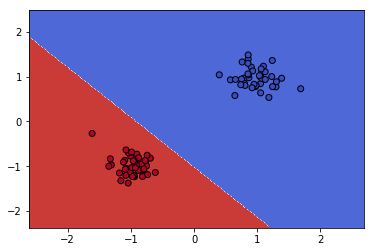

SVM Plot


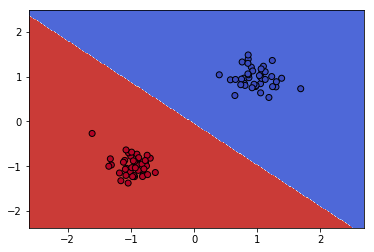

In [7]:
clf_perceptron= Perceptron()
clf2_SVM=LinearSVC()
clf_perceptron.fit(X_train,Y_train)
clf2_SVM.fit(X_train,Y_train)
print("Perceptron Plot")
plot_boundary(clf_perceptron,X_train,Y_train,xx,yy)
print("SVM Plot")
plot_boundary(clf2_SVM,X_train,Y_train,xx,yy)

# Explaination:
Above plots represents the perceptron algorithm and SVM using scikit learn on same dataset. As we can see in the plots, in case of perceptron, decision bountry is close to one class of data points and far from another class of dataponts, however in SVM decision boundry is at equal distance from both classes of data points. Perceptron does not try to find optimal seperation , as soon as it finds a seperating hyperplan or decision boundry , it is fine for it. However, SVM on the other hand tries to maximize the distance between two closest opposite sample points.